In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
%matplotlib inline

In [5]:
df = pd.read_csv('engg_recommendation.csv', index_col=False)

In [60]:
df['Heading']

0                     The Design in Software Design: MVC
1                       DSL: Development Second Language
2      Airframe HTTP: Building Low-Friction Web Servi...
3           API security in a microservices architecture
4      Let your analytics drive engagement: Endpoint ...
5           Differentiating Artificial Intelligence Buzz
6        Custom Xcode Template for Static Library in iOS
7              Building a Kubernetes Cluster on a Budget
8      4 Tactics to Improve Sprint Predictability in ...
9                    Proxies, markers, and observability
10     Transparent and Interpretable AI: an interview...
11               Introducing a tensorflow server sidecar
12                               Mocking is a Code Smell
13         Kubernetes: piloting the cybernetic dreamboat
14     Public Cloud Inter-region Network Latency as H...
15      Cookies vs. LocalStorage: What’s the difference?
16     Django authentication via Google, Deezer, and ...
17               Cross-domain t

In [6]:
print('dataset dimensions are:', df.shape)
df.describe(include = 'all')

dataset dimensions are: (1000, 5)


,Participant,Heading,URL,Tags,Likes
count,1000,1000,1000,1000,1000.0
unique,8,774,775,763,NaN
top,Trishanth,Reinforcement Learning: Towards an Emotion Bas...,https://medium.com/@parkershepherd/why-web-per...,"['Machine Learning', 'Artificial Intelligence'...",NaN
freq,169,4,4,5,NaN
mean,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,1.0


In [7]:
#df_sample = df.iloc[:200] 
df_sample = df

In [8]:
df_sample

,Participant,Heading,URL,Tags,Likes
0,Ram,The Design in Software Design: MVC,https://medium.com/@baileydiveley/the-design-i...,['Web Development'],1
1,Karthik,DSL: Development Second Language,https://medium.com/@queeniwu/dsl-development-s...,"['Programming', 'Development', 'Web Developmen...",1
2,Karthik,Airframe HTTP: Building Low-Friction Web Servi...,https://medium.com/airframe/airframe-http-a-mi...,"['Web Development', 'Airframe', 'Scala', 'Fina...",1
3,Nisha,API security in a microservices architecture,https://medium.com/@timleytens/api-security-in...,"['Microservices', 'Software Architecture', 'AP...",1
4,Trishanth,Let your analytics drive engagement: Endpoint ...,https://medium.com/@FizzyInTheHall/let-your-an...,"['AWS', 'Kotlin', 'Android App Development', '...",1
5,Shivam,Differentiating Artificial Intelligence Buzz,https://medium.com/latinxinai/overview-of-arti...,"['Machine Learning', 'Deep Learning', 'Latinos...",1
6,Nisha,Custom Xcode Template for Static Library in iOS,https://medium.com/@09mejohn/custom-xcode-temp...,"['iOS', 'Xcode', 'Swift Programming', 'Objecti...",1
7,Ram,Building a Kubernetes Cluster on a Budget,https://medium.com/@xaviablaza/building-a-kube...,"['Docker', 'SaaS', 'Kubernetes', 'K8s', 'Self ...",1
8,Nisha,4 Tactics to Improve Sprint Predictability in ...,https://medium.com/@natalieaconklin/4-tactics-...,"['Agile', 'Big Data', 'Analytics', 'Software D...",1
9,Parshwa,"Proxies, markers, and observability",https://medium.com/@eduardoromero/proxies-mark...,"['Serverless', 'Observability', 'Es6 Proxies',...",1


In [9]:
cif = df_sample['Participant'].unique()
product = df_sample['Heading'].unique()
print(len(cif))
print (len(product))

8
774


In [10]:
#Delete rows with no Customer ID (if there is such a case)
cleaned_retail = df_sample.loc[pd.isnull(df_sample.Participant) == False]

#Create a lookup table
item_lookup = cleaned_retail[['Heading', 'URL']].drop_duplicates()
item_lookup['Heading'] = item_lookup.Heading.astype(str)

In [11]:
cleaned_retail['Participant'] = cleaned_retail.Participant.astype(str)
cleaned_retail = cleaned_retail[['Heading', 'Likes', 'Participant']]
print (cleaned_retail)

                                               Heading  Likes Participant
0                   The Design in Software Design: MVC      1         Ram
1                     DSL: Development Second Language      1     Karthik
2    Airframe HTTP: Building Low-Friction Web Servi...      1     Karthik
3         API security in a microservices architecture      1       Nisha
4    Let your analytics drive engagement: Endpoint ...      1   Trishanth
5         Differentiating Artificial Intelligence Buzz      1      Shivam
6      Custom Xcode Template for Static Library in iOS      1       Nisha
7            Building a Kubernetes Cluster on a Budget      1         Ram
8    4 Tactics to Improve Sprint Predictability in ...      1       Nisha
9                  Proxies, markers, and observability      1     Parshwa
10   Transparent and Interpretable AI: an interview...      1      Venkat
11             Introducing a tensorflow server sidecar      1     Parshwa
12                             Mocking

In [12]:
#Do some 'data cleaning' to raw data
cleaned_retail['Participant'] = cleaned_retail.Participant.astype(str)
cleaned_retail = cleaned_retail[['Heading', 'Likes', 'Participant']]
grouped_cleaned = cleaned_retail.groupby(['Participant', 'Heading']).sum().reset_index()

In [13]:
grouped_cleaned

,Participant,Heading,Likes
0,Deep,"*tech-edition: Django Dockerization, with bell...",1
1,Deep,4 Resiliency Patterns Leveraged by Capital One...,1
2,Deep,5 Keys to Successful API Integrations,1
3,Deep,5 Steps to Unit Test your Code Daily,1
4,Deep,6 Design Principles for Your HTTP APIs,1
5,Deep,A DevOps Periodic Table of Critical Alert Moni...,1
6,Deep,A Guide to Using a Third Party API with React ...,1
7,Deep,A Reality Check About Cloud Native DevOps,1
8,Deep,A Startup Vet Reveals His Secrets to Assemblin...,1
9,Deep,"A Year Of Running Kubernetes at MYOB, And The ...",1


In [14]:
grouped_cleaned.Likes.loc[grouped_cleaned.Likes == 0] = 1
grouped_purchased = grouped_cleaned.query('Likes > 0')

/home/shivam/python-env/torch/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
#Count number of products and number of customers in the reduced dataset 
no_products = len(grouped_purchased.Heading.unique())
no_customers = len(grouped_purchased.Participant.unique())
print('Number of customers in dataset:', no_customers)
print('Number of products in dataset:', no_products)

Number of customers in dataset: 8
Number of products in dataset: 774


In [16]:
ratings = grouped_purchased.pivot(index = 'Participant', columns='Heading', values='Likes')

In [17]:
ratings

Heading,"*tech-edition: Django Dockerization, with bells and whistles, and a tad bit of cleverness",.Net Core Email Sender Library with Razor Templates (.cshtml) contained in it,14 Rules for writing a data migration,18 Of The Best Tools For Mobile App Designers,3 Reasons to Build Monolithic Systems,4 Keys to a Successful Supply Chain Visibility and Analytics Project,4 Resiliency Patterns Leveraged by Capital One’s Mobile Edge Engineering Team,4 Tactics to Improve Sprint Predictability in Big Data Analytics Projects,5 Keys to Successful API Integrations,5 Steps to Unit Test your Code Daily,...,You Have APIs — Why Aren’t You Managing (all of) Them?,You love algorithms! 🤣🤣🤣,[ NIPS 2016 ] Direct Feedback Alignment Provides Learning in Deep Neural Networks with Interactive Code [ Manual Back Prop with TensorFlow ],[AI] What are those colourful charts with colourful dots?,h1–702 CTF — Web Challenge Write Up,katalog-sync: Reliable Integration of Consul and Kubernetes,ko: fast Kubernetes microservice development in Go,“Cloud is an undisputed reality.”,"“Multiplicity” Discovered: Bionic-Humans and Humanoid-bots in the Race to Artificial Intelligence, Challenging the AI Frontier",“Seeing Beyond Walls” — Human Pose Estimation Under Occlusions
Participant,,,,,,,,,,,,,,,,,,,,,
Deep,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Karthik,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nisha,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Parshwa,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Ram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
Shivam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trishanth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venkat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0


In [18]:
#Turn raw data to pivot ('ratings' matrix)
ratings = grouped_purchased.pivot(index = 'Participant', columns='Heading', values='Likes').fillna(0).astype('int')
#Binarize the ratings matrix (indicate only if a customer has purchased a product or not)
ratings_binary = ratings.copy()
ratings_binary[ratings_binary != 0] = 1

In [19]:
ratings_binary

Heading,"*tech-edition: Django Dockerization, with bells and whistles, and a tad bit of cleverness",.Net Core Email Sender Library with Razor Templates (.cshtml) contained in it,14 Rules for writing a data migration,18 Of The Best Tools For Mobile App Designers,3 Reasons to Build Monolithic Systems,4 Keys to a Successful Supply Chain Visibility and Analytics Project,4 Resiliency Patterns Leveraged by Capital One’s Mobile Edge Engineering Team,4 Tactics to Improve Sprint Predictability in Big Data Analytics Projects,5 Keys to Successful API Integrations,5 Steps to Unit Test your Code Daily,...,You Have APIs — Why Aren’t You Managing (all of) Them?,You love algorithms! 🤣🤣🤣,[ NIPS 2016 ] Direct Feedback Alignment Provides Learning in Deep Neural Networks with Interactive Code [ Manual Back Prop with TensorFlow ],[AI] What are those colourful charts with colourful dots?,h1–702 CTF — Web Challenge Write Up,katalog-sync: Reliable Integration of Consul and Kubernetes,ko: fast Kubernetes microservice development in Go,“Cloud is an undisputed reality.”,"“Multiplicity” Discovered: Bionic-Humans and Humanoid-bots in the Race to Artificial Intelligence, Challenging the AI Frontier",“Seeing Beyond Walls” — Human Pose Estimation Under Occlusions
Participant,,,,,,,,,,,,,,,,,,,,,
Deep,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0
Karthik,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nisha,0,0,0,0,0,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
Parshwa,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Ram,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Shivam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trishanth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venkat,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [21]:
#Initialize zeros dataframe for product interactions
products_integer = np.zeros((no_products,no_products))

print('Counting how many times each pair of products has been purchased...')
for i in range(no_products):
    for j in range(no_products):
        if i != j:
            df_ij = ratings_binary.iloc[:,[i,j]] #create a temporary df with only i and j products as columns
            sum_ij = df_ij.sum(axis=1)
            pairings_ij = len(sum_ij[sum_ij == 2]) #if s1_ij == 2 it means that both products were purchased by the same customer
            products_integer[i,j] = pairings_ij
            products_integer[j,i] = pairings_ij
            #print (df_ij)

Counting how many times each pair of products has been purchased...


In [22]:
sum_ij

Participant
Deep         0
Karthik      0
Nisha        0
Parshwa      0
Ram          0
Shivam       0
Trishanth    0
Venkat       2
dtype: int64

In [23]:
pairings_ij

1

In [24]:
print('Counting how many times each individual product has been purchased...')
times_purchased = products_integer.sum(axis = 1)

Counting how many times each individual product has been purchased...


In [25]:
#Construct final weighted matrix of item interactions
print('Building weighted product matrix...')
products_weighted = np.zeros((no_products,no_products))
for i in range(no_products):
    for j in range(no_products):
        if (times_purchased[i]+times_purchased[j]) !=0: #make sure you do not divide with zero
            products_weighted[i,j] = (products_integer[i,j])/(times_purchased[i]+times_purchased[j])

Building weighted product matrix...


In [26]:
'''
#Get list of item labels (instead of Codes)
nodes_codes = np.array(ratings_binary.columns).astype('str')
item_lookup_dict = pd.Series(item_lookup.Description.values,index=item_lookup.StockCode).to_dict()
#nodes_labels = [item_lookup_dict[code] for code in nodes_codes]
'''

"\n#Get list of item labels (instead of Codes)\nnodes_codes = np.array(ratings_binary.columns).astype('str')\nitem_lookup_dict = pd.Series(item_lookup.Description.values,index=item_lookup.StockCode).to_dict()\n#nodes_labels = [item_lookup_dict[code] for code in nodes_codes]\n"

In [28]:
nodes_codes = np.array(ratings_binary.columns).astype('str')
nodes_labels = list(nodes_codes)

/home/shivam/python-env/torch/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


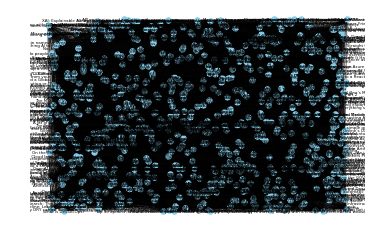

In [29]:
#Create Graph object using the weighted product matrix as adjacency matrix
G = nx.from_numpy_matrix(products_weighted)
pos=nx.random_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = nodes_labels[idx]

nx.draw_networkx_nodes(G, pos , node_color="skyblue", node_size=30)
nx.draw_networkx_edges(G, pos,  edge_color='k', width= 0.3, alpha= 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=4)
plt.axis('off')
plt.show() # display

In [30]:
#Export graph to Gephi
H=nx.relabel_nodes(G,labels) #create a new graph with Description labels and save to Gephi for visualizations
nx.write_gexf(H, "products.gexf")

In [31]:
#Find communities of nodes (products)
partition = community_louvain.best_partition(G, resolution = 1.5)
values = list(partition.values())

In [32]:
#Check how many communities were created
print('Number of communities:', len(np.unique(values)))

Number of communities: 6


In [36]:
#Create dataframe with product description and community id
products_communities = pd.DataFrame(nodes_labels, columns = ['Headings'])
products_communities['community_id'] = values

In [37]:
#Lets take a peek at community 1
products_communities[products_communities['community_id']==1].head(15)

,Headings,community_id
1,.Net Core Email Sender Library with Razor Temp...,1
2,14 Rules for writing a data migration,1
3,18 Of The Best Tools For Mobile App Designers,1
4,3 Reasons to Build Monolithic Systems,1
10,5 code improvements you can apply today to mak...,1
11,5 ways to make your codebase withstand the tes...,1
15,7 things you don’t know about agile architecture,1
16,A Better AWS SDK,1
21,A Guide to Becoming a Full-Stack Developer in ...,1
23,A Guide to Using a Third Party API with React ...,1


In [57]:
#Lets now divide each element in products_weighted dataframe with the maximum of each row.
#This will normalize values in the row and we can perceive it as the possibility af a customer also buying
#product in column j after showing interest for the product in row i

#Turn into dataframe
products_weighted_pd = pd.DataFrame(products_weighted, columns = nodes_labels)
products_weighted_pd.set_index(products_weighted_pd.columns, 'product', inplace=True)

products_prob = products_weighted_pd.divide(products_weighted_pd.max(axis = 1), axis = 0)

In [68]:
products_weighted_pd.index.values

array(['*tech-edition: Django Dockerization, with bells and whistles, and a tad bit of cleverness',
       '.Net Core Email Sender Library with Razor Templates (.cshtml) contained in\xa0it',
       '14 Rules for writing a data migration',
       '18 Of The Best Tools For Mobile App Designers',
       '3 Reasons to Build Monolithic Systems',
       '4 Keys to a Successful Supply Chain Visibility and Analytics Project',
       '4 Resiliency Patterns Leveraged by Capital One’s Mobile Edge Engineering Team',
       '4 Tactics to Improve Sprint Predictability in Big Data Analytics Projects',
       '5 Keys to Successful API Integrations',
       '5 Steps to Unit Test your Code\xa0Daily',
       '5 code improvements you can apply today to make your website more accessible',
       '5 ways to make your codebase withstand the test of\xa0time',
       '6 Design Principles for Your HTTP\xa0APIs',
       '6 Reasons I loved the 2018 Deep Learning\xa0Indaba',
       '6 Things to consider before goi

In [53]:
basket = ['4 Keys to a Successful Supply Chain Visibility and Analytics Project']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)


You may also consider reading the following articles: ['Analytics services. Customer analytics', 'Evolving Data Models with JanusGraph', 'Image recognition using the Azure Custom Vision\xa0Service']


In [58]:
basket = ['A primer on the noble craft of refactoring']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)

You may also consider reading the following articles: ['Software Wind\xa0Window', 'Remodeling Cash App\xa0Payments', 'Into the clouds: a software architect’s journey']


In [71]:
basket = ['Getting Started with Terraform and Google Cloud\xa0Platform']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)

You may also consider reading the following articles: ['*tech-edition: Django Dockerization, with bells and whistles, and a tad bit of cleverness', 'Using NodeSelector to Schedule Deployments with large volumes of Stateful Data on Kubernetes', 'Building the Jumbo Tech Campus organization using Agile, Spotify and Pathfinders']


In [69]:
basket = ['A Cloud-Native API Part 1: Google Cloud and Kubernetes']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)

You may also consider reading the following articles: ['Running Wild Container Image on ICP 3.1.1\u200a—\u200aSecurity and Enforcement', 'Network IP Ranges of a Private Kubernetes Cluster in Google Cloud\xa0Platform', 'Automatic Kubernetes deployment with Gaia and HashiCorp Vault']


In [ ]:
basket = ['A Cloud-Native API Part 1: Google Cloud and Kubernetes']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)

In [72]:
basket = ['Future of AI: Reinforcement Learning corrects for Deep Learning’s blind\xa0spots']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles:', suggestions_to_customer)

You may also consider reading the following articles: ['Does AI Really Speak Our Language?', 'Conversational AI ‒ but where is the\xa0I?', 'The Global AI Revolution: Threat or\xa0Triumph']


In [73]:
#'
basket = ['Resources for Front End Developers & Thoughts on Angular, React, Redux, Node and\xa0Git']
no_of_suggestions = 3

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider reading the following articles: ', suggestions_to_customer)

You may also consider reading the following articles: ['Think your startup idea will work? Run a premortem for the best chance at\xa0success', 'Design Sprints for Scrum\xa0Projects', 'Creating a Donut Chart in React Native with D3 and\xa0ART']
